In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [44]:
# Import the dataset
tweet = pd.read_csv("volvo1.csv")
tweet=tweet.replace(' ', np.nan)
tweet['Tweet_time']

0       2020-10-10 19:19:17
1       2020-10-10 19:23:36
2       2020-10-10 21:29:07
3       2020-10-10 21:09:26
4       2020-10-10 20:04:23
               ...         
6992    2020-08-26 23:34:36
6993    2020-08-27 00:08:34
6994    2020-08-27 00:14:36
6995    2020-08-26 22:46:15
6996    2020-08-26 22:38:02
Name: Tweet_time, Length: 6997, dtype: object

In [45]:
# Data Preprocessing
print("Shape of the dataframe is", tweet.shape)
print("The number of nulls in each column are \n", tweet.isna().sum())

Shape of the dataframe is (6997, 27)
The number of nulls in each column are 
 Tweet_url                   0
Tweet_id                    0
Tweet_user_id               0
Tweet_username              0
Tweet_account               0
Tweet_user_location      1278
Tweet_user_followers        0
Tweet_user_following        0
Tweet_time                  0
Tweet_location           6762
Tweet_country_code       6763
Tweet_content               0
Tweet_contain_links      2168
Tweet_image_urls         3928
Tweet_retweet_count         0
Tweet_reply_count           0
Tweet_like_count            0
Tweet_quote_links        3405
Retweet_url              6860
Retweet_id                  0
Retweet_username         6860
Retweet_account          6860
Retweet_time             6860
Retweet_location         6994
Retweet_content          6860
Retweet_contain_links    6901
Retweet_image_urls       6923
dtype: int64


In [46]:
t=tweet['Tweet_content'].to_list()
for i in range(10):
    print("tweet Number"+str(i+1)+": "+t[i])

tweet Number1: 2019 Volvo S60 Denim Blue Metallic Sedan 4 Doors $30444 - to view more details go to
tweet Number2: @VolvoCarUK is it appropriate selling an XC40 without rear interior lights? Safely placing the baby in the back is not easy in the dark. This is a corner I would not expect Volvo to cut and can the lights be retrofitted?  Good thing we checked that the steering wheel is included.
tweet Number3: @volvoshine Yes! Xc60 (just traded in the xc40 since were in the burbs and have a place to put a vehicle lol)
tweet Number4: Peugeot e-2008  via @autocar Thank GOD PSA will be merging with the Scumbags at FCA next year.  They have some nice stuff, check out Peugeot/Citroen/DS Automobiles, hopefully will be sold in the U.S.  This car looks much better than the Volvo XC40.
tweet Number5: Remember the ‘Cult of Colts’? Well, they got a lairy Swedish friend! #Volvo
tweet Number6: @martingrefte @fly4dat @TilmanWinkler @skyman661 @mgoetzke That also underlines Fremont is not very efficient

In [47]:
tweet['Tweet_country_code'].value_counts().head(n=20)

US    87
GB    43
SE    18
IN    10
ZA     8
DE     8
MY     8
CA     6
SG     6
BR     5
NL     5
PL     3
BE     3
AE     2
AU     2
ES     2
TR     2
IE     2
KE     2
DK     2
Name: Tweet_country_code, dtype: int64

In [48]:
t1=tweet[~tweet['Tweet_username'].str.contains('Audi|audi|volvo|Volvo|SHEIN|fasting|KetoCycle')]

/Users/SHIRLEY/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


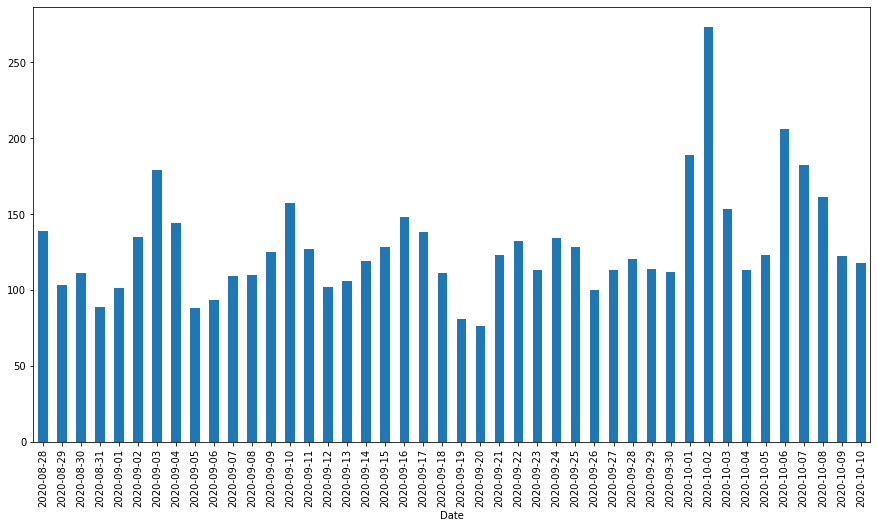

In [49]:
t1.loc[:,'Date']=pd.to_datetime(t1['Tweet_time']).dt.date
t1.loc[:,'Time']=pd.to_datetime(t1['Tweet_time']).dt.time
daily=t1.groupby('Date').size().iloc[3:-1]
daily.plot(x='Date',kind='bar',figsize=(15,8))


In [20]:
#top 10 retweet
top_retweet=t1.sort_values(by='Tweet_retweet_count',ascending=False).reset_index()[['Tweet_content','Tweet_username','Tweet_retweet_count']].head(10)
top_retweet

,Tweet_content,Tweet_username,Tweet_retweet_count
0,Naver article: MAMAMOO's Hwasa has recently up...,jn | HELP TWEET LIMIT😭,370
1,Some other facts because people keep asking:\t...,mo 🍯,139
2,"#Ford, #Tesla, #Mercedes, and #Volvo are suing...","Anders Corr, Ph.D.",107
3,The #1950s #Volvo #PV445 #Duett is an undeniab...,Quirky Rides,69
4,Cars are riding on the popularity of cultural ...,^,67
5,related keywords for Hwasa on Naver\t\tVolvo x...,Mamoomoo,59
6,#ジブリで学ぶPSO2\t\t/ce on /ci2 nw s60,10key,52
7,@MeidasTouch @realDonaldTrump The stable geniu...,Dr.mewithaPhd,45
8,The #Volvo P1800 Cyan Has Taken The ‘Saintly’ ...,Classic Car Curation,40
9,DISCOUNTED PRICE!!! 40M\tVolvo S60 model 2012\...,Busheltak Motors,35


In [50]:
#top 10 reply
top_reply=t1.sort_values(by='Tweet_reply_count',ascending=False).reset_index()[['Tweet_content','Tweet_username','Tweet_reply_count']].head(10)
top_reply

,Tweet_content,Tweet_username,Tweet_reply_count
0,Naver article: MAMAMOO's Hwasa has recently up...,jn | HELP TWEET LIMIT😭,137
1,FINE! Volvo XC90 it is! but I'm going to make ...,Jake E. Munro #BlackLivesMatter,53
2,Who’s Volvo estate are you having? Jerry Leadb...,Mark M - ‘From the Potato’s Sack’,28
3,Which non-Tesla #EV excites you the most? Does...,Out of Spec Motoring,24
4,"#Ford, #Tesla, #Mercedes, and #Volvo are suing...","Anders Corr, Ph.D.",22
5,Anybody on here drive a Volvo XC60 or XC90?\tA...,Ed van der Walt,20
6,@MeidasTouch @realDonaldTrump The stable geniu...,Dr.mewithaPhd,20
7,"Question, would American full size SUVs fit in...",©GMAN car reviews 🇿🇦🏁,14
8,Two weeks off and back to work today to be inf...,Pc Jon HARDY 👮🏻‍🚔🐀,13
9,I don’t only detail Teslas. Exterior wash and ...,Zack,13


In [24]:
#top 10 like 
top_like=t1.sort_values(by='Tweet_like_count',ascending=False).reset_index()[['Tweet_content','Tweet_username','Tweet_like_count']].head(10)
top_like

,Tweet_content,Tweet_username,Tweet_like_count
0,Naver article: MAMAMOO's Hwasa has recently up...,jn | HELP TWEET LIMIT😭,1583
1,DISCOUNTED PRICE!!! 40M\tVolvo S60 model 2012\...,Busheltak Motors,384
2,FINE! Volvo XC90 it is! but I'm going to make ...,Jake E. Munro #BlackLivesMatter,366
3,DISCOUNTED PRICE!!! 89M\tVolvo R-Design XC90 m...,Busheltak Motors,320
4,Cars are riding on the popularity of cultural ...,^,314
5,The #1950s #Volvo #PV445 #Duett is an undeniab...,Quirky Rides,309
6,DISCOUNTED PRICE!!! 68M\tVolvo XC90 model 2010...,Busheltak Motors,279
7,Some other facts because people keep asking:\t...,mo 🍯,211
8,Everything you need to know about cars this we...,Top Gear,196
9,"The #Volvo P1800 is a timelessly cool car, but...",Autocar,196


In [26]:
# from nltk.tokenize import word_tokenize
# print(word_tokenize(t1['clean_text'][1]))

In [28]:
def drawbarplot(x,y,xlabel,title,figsize=(10,10)):
    plt.figure(figsize=figsize)    
    sns.barplot(x=x,y=y,palette = 'terrain',orient='h',order=y)
    for i,v in enumerate(x):
        plt.text(0.8,i,v,color='k')
    
    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize =14)
    plt.show()

/Users/SHIRLEY/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/SHIRLEY/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127752 missing from current font.
  font.set_text(s, 0, flags=flags)


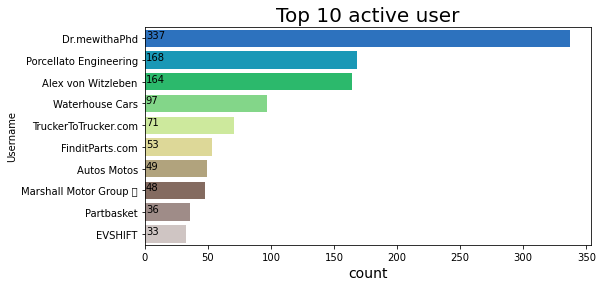

In [29]:
count=t1['Tweet_username'].value_counts()
df_count=pd.DataFrame()
df_count['Username'] = count.index
df_count['activeCount'] = count.values
df_count = df_count.iloc[:10,:]
drawbarplot(x=df_count.activeCount,y=df_count.Username,xlabel='count',title='Top 10 active user',figsize=(8,4))

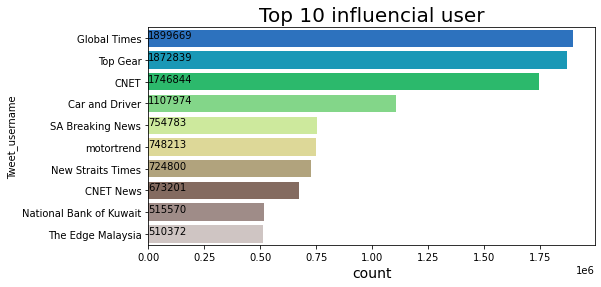

In [30]:
df_userfollower = t1.loc[:,['Tweet_username','Tweet_user_followers']]
df_userfollower.sort_values(by='Tweet_user_followers',ascending=False,inplace=True)
df_userfollower.drop_duplicates(subset='Tweet_username',keep='first',inplace=True)
df_count =df_userfollower.iloc[:10,:]
drawbarplot(x=df_count.Tweet_user_followers,y=df_count.Tweet_username,xlabel='count',title='Top 10 influencial user',figsize=(8,4))

In [33]:
# mentions_keys=list(['#volvo', '#volvoc30', '#volvos60', '#volvoxc90','vovloxc40','xc40bev','xc40','xc90','s60'])
st_words = set(STOPWORDS)
#enhancing stopword by removing @mentions and shorthands
st_words.update(['https','CO','RT','Please','via','amp','place','new','ttot','best','great','top','ht','Volvo','car','cars'])
# st_words.update([s.lower() for s in mentions_keys])

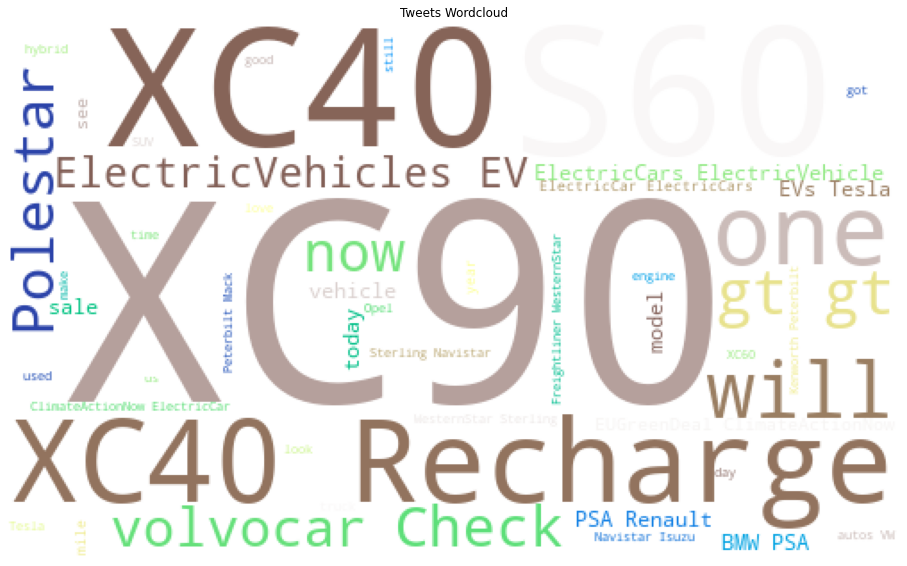

In [35]:
wc = WordCloud(height=300,repeat=False,width=500,max_words=50,stopwords=st_words,colormap='terrain',background_color='white').generate(' '.join(t1['Tweet_content'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Tweets Wordcloud')
plt.axis('off')
plt.show()

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin
import emoji
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

class TextCounts(BaseEstimator, TransformerMixin):
    
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))
    
    def fit(self, X, y=None, **fit_params):
        # fit method is used when specific operations need to be done on the train data, but not on the test data
        return self
    
    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x)) 
        count_mentions = X.apply(lambda x: self.count_regex(r'@\w+', x))
        count_hashtags = X.apply(lambda x: self.count_regex(r'#\w+', x))
        #count_capital_words = X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b', x))
        #count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        count_urls = X.apply(lambda x: self.count_regex(r'http.?://[^\s]+[\s]?', x))
        # We will replace the emoji symbols with a description, which makes using a regex for counting easier
        # Moreover, it will result in having more words in the tweet
        count_emojis = X.apply(lambda x: emoji.demojize(x)).apply(lambda x: self.count_regex(r':[a-z_&]+:', x))
        
        df = pd.DataFrame({'count_words': count_words
                           , 'count_mentions': count_mentions
                           , 'count_hashtags': count_hashtags                           
                           , 'count_urls': count_urls
                           , 'count_emojis': count_emojis
                          })
        
        return df

In [37]:
tc = TextCounts()
df_feature =  tc.fit_transform(t1['Tweet_content'])
df_feature.head(20)

,count_words,count_mentions,count_hashtags,count_urls,count_emojis
0,16,0,0,0,0
1,51,1,0,0,0
2,22,1,0,0,0
3,46,1,0,0,0
4,13,0,1,0,0
5,58,5,0,0,0
6,43,1,0,0,0
7,26,0,14,0,0
8,8,0,1,0,0
9,37,0,3,0,0


In [38]:
class CleanText(BaseEstimator, TransformerMixin):
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)

    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def remove_stopwords(self, input_text):
        #stopwords_list = st_words
        stopwords_list=STOPWORDS
        # Some words which might indicate a certain sentiment are kept via a whitelist        
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 1] 
        return " ".join(clean_words) 
    
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.emoji_oneword).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords).apply(self.stemming)        
        return clean_X

In [42]:
ct = CleanText()
t1.loc[:,'clean_text'] = ct.fit_transform(t1.loc[:,'Tweet_content'])
#Imputing '[no text]' value where there is no text
# df_final.loc[df_final['TweetBody'] == '','TweetBody'] = '[no text]'
t1['clean_text']

0        volvo denim blue metal sedan door view detail go
1       appropri sell xc without rear interior light s...
2                ye xc trade xc burb place put vehicl lol
3       peugeot via thank god psa will merg scumbag fc...
4       rememb ‘cult colts’ well got lairi swedish fri...
                              ...                        
6992    august tripl award volvo buse swedish manufact...
6993                                    fresh start volvo
6994    day million million last year dip million day ...
6995    jacob warrant arrest rape teenag girl go add c...
6996                                   wish peopl thought
Name: clean_text, Length: 5789, dtype: object